In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import time
import artm

# change log style
lc = artm.messages.ConfigureLoggingArgs()
lc.minloglevel = 3
lib = artm.wrapper.LibArtm(logging_config=lc)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
from copy import deepcopy
from topicnet.cooking_machine.models.topic_model import TopicModel
from topicnet.cooking_machine.cubes import RegularizersModifierCube
from topicnet.cooking_machine.models.blei_lafferty_score import BleiLaffertyScore
from topicnet.cooking_machine.config_parser import build_experiment_environment_from_yaml_config

from topicnet.cooking_machine.experiment import Experiment
from topicnet.cooking_machine.cubes import *
from topicnet.cooking_machine.dataset import Dataset

%load_ext autoreload
%autoreload 2

In [3]:
import topicnet.cooking_machine.cubes as tncubes

In [4]:
from IPython.core.display import display, HTML
from IPython.display import clear_output, display_html
display(HTML("""<style>
.container { width:90% !important; }
div.output_scroll .output_subarea { white-space: pre; }
</style>"""))

### Get dataset

In [5]:
DATASET_PATH = "/home/sultan/datasets/PScience/PScience.csv"

In [6]:
dataset = Dataset(DATASET_PATH)
dictionary = dataset.get_dictionary()

In [7]:
print(dataset.get_possible_modalities())
dataset.get_dataset().head()

{'@3gramm', '@word', '@title', '@post_tag', '@2gramm', '@snippet', '@author'}


,vw_text,raw_text
id,,
1.txt,1.txt |@author fuchs preobrazhensky tabachniko...,@title Автограф # «Математический дивертисмент...
2.txt,2.txt |@word книга:2 лекция:3 рассматриваться:...,@title Главы: Маскулинности в российском конте...
3.txt,3.txt |@word развитие появляться пиджина:4 бел...,@title Пиджины и креольские языки | @snippet Л...
4.txt,4.txt |@word стандартный задача:3 состоять:4 р...,@title FAQ: Физиология микроводорослей | @snip...
5.txt,5.txt |@2gramm повседневный_практика государст...,@title Русская государственная идеология | @sn...


### Make initial model

In [8]:
with open("/home/sultan/recipes/ARTM_baseline_smooth_bigram.yml", "r") as f:
    yaml_string = f.read()

specific_topics = [f'topic_{i}' for i in range(27)]
background_topics = [f'bcg_{i}' for i in range(len(specific_topics),len(specific_topics) + 2)]

yaml_string = yaml_string.format(
    modality_list=['@2gramm', '@word', '@post_tag', '@3gramm'],
    main_modality='@word',
    specific_modality='@2gramm',
    specific_modality2='@3gramm',
    dataset_path=DATASET_PATH,
    specific_topics=specific_topics,
    background_topics=background_topics)

print(yaml_string)

# This config follows a strategy described by Murat Apishev
# one of the core programmers of BigARTM library in personal correspondence.
# According to his letter 'decent' topic model can be obtained by
# Decorrelating model topics simultaneously looking at retrieved TopTokens


# Use .format(modality_list=modality_list, main_modality=main_modality, dataset_path=dataset_path,
# specific_topics=specific_topics, background_topics=background_topics)
# when loading the recipe to adjust for your dataset

topics:
# Describes number of model topics, better left to the user to define optimal topic number
    specific_topics: ['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26'] 
    background_topics: ['bcg_27', 'bcg_28']

# Here is exam

### Run experiment

In [9]:
from topicnet.cooking_machine.experiment import Experiment
if os.path.exists(f'./MuratDemo_smooth') == True:
    os.system("rm -rf ./MuratDemo_smooth")
experiment, dataset = build_experiment_environment_from_yaml_config(
    yaml_string,
    experiment_id="MuratDemo_smooth",
    save_path="MuratDemo_smooth"
)

In [10]:
experiment.run(dataset)

/home/sultan/miniconda3/lib/python3.6/site-packages/topicnet/cooking_machine/cubes/base_cube.py:206: UserWarning: Perplexity is too high for threshold 1.05
  warnings.warn(warning_message)
/home/sultan/miniconda3/lib/python3.6/site-packages/topicnet/cooking_machine/cubes/base_cube.py:206: UserWarning: Max progression length exceeded
  warnings.warn(warning_message)


{<topicnet.cooking_machine.models.topic_model.TopicModel at 0x7ff514cb9630>}

In [11]:
experiment.show()

Experiment MuratDemo_smooth

Experiment was made with BigARTM 0.9.0
Tree:
                                                                                                                                        ┌##17h55m06s_18d11m2019y###
                                                                                                                                        │                                                                                                       ┌##18h25m53s_18d11m2019y###
                                                                                                                                        │                                                                                                       ├##18h27m04s_18d11m2019y###
                                                                                                                                        │                                                                                         

In [12]:
best_model = experiment.select(experiment.criteria[-1][0])[0]

In [13]:
best_model.describe_regularizers()

tau  gamma
model_id                   regularizer_name                           
##18h44m06s_18d11m2019y### smooth_phi_bcg              9.949604    NaN
                           smooth_theta_bcg           93.597598    NaN
                           decorrelation_phi           0.000000    0.0
                           decorrelation_phi_@2gramm   0.000000    0.0
                           decorrelation_phi_@3gramm   0.060000    0.0
                           smooth_phi_@2gramm          0.000000    NaN
                           smooth_phi_@3gramm          0.250000    NaN

In [14]:
best_model.describe_scores()

last_value
model_id                   score_name                                                                               
##18h44m06s_18d11m2019y### PerplexityScore@all                                                           1.05165e+10
                           SparsityThetaScore                                                              0.0488067
                           SparsityPhiScore@2gramm                                                          0.697437
                           PerplexityScore@2gramm                                                            1973.68
                           TopicKernel@2gramm.average_coherence                                                    0
                           TopicKernel@2gramm.average_contrast                                              0.506818
                           TopicKernel@2gramm.average_purity                                                 0.38094
                           TopicKernel@2gramm.average_size                                                   288.345
                           TopicKernel@2gramm.coherence            {'topic_0': 0.0, 'topic_1': 0.0, 'topic_2': 0....
                           TopicKernel@2gramm.contrast             {'topic_0': 0.46329352259635925, 'topic_1': 0....
                           TopicKernel@2gramm.purity               {'topic_0': 0.28677496314048767, 'topic_1': 0....
                           TopicKernel@2gramm.size                 {'topic_0': 235.0, 'topic_1': 350.0, 'topic_2'...
                           TopicKernel@2gramm.tokens               {'topic_0': ['идти_дождь', 'рамка_концепция', ...
                           SparsityPhiScore@word                                                            0.618339
                           PerplexityScore@word                                                              3298.65
                           TopicKernel@word.average_coherence                                                      0
                           TopicKernel@word.average_contrast                                                0.459593
                           TopicKernel@word.average_purity                                                     0.138
                           TopicKernel@word.average_size                                                     422.517
                           TopicKernel@word.coherence              {'topic_0': 0.0, 'topic_1': 0.0, 'topic_2': 0....
                           TopicKernel@word.contrast               {'topic_0': 0.45213043689727783, 'topic_1': 0....
                           TopicKernel@word.purity                 {'topic_0': 0.10657232254743576, 'topic_1': 0....
                           TopicKernel@word.size                   {'topic_0': 184.0, 'topic_1': 232.0, 'topic_2'...
                           TopicKernel@word.tokens                 {'topic_0': ['эпикура', 'бесстрашный', 'ясперс...
                           SparsityPhiScore@post_tag                                                        0.868743
                           PerplexityScore@post_tag                                                          47.8679
                           TopicKernel@post_tag.average_coherence                                                  0
                           TopicKernel@post_tag.average_contrast                                            0.777833
                           TopicKernel@post_tag.average_purity                                              0.822803
                           TopicKernel@post_tag.average_size                                                 36.2069
                           TopicKernel@post_tag.coherence          {'topic_0': 0.0, 'topic_1': 0.0, 'topic_2': 0....
                           TopicKernel@post_tag.contrast           {'topic_0': 0.7329791784286499, 'topic_1': 0.7...
                           TopicKernel@post_tag.purity             {'topic_0': 0.9183759689331055, 'topic_1': 0.8...
           

## Results

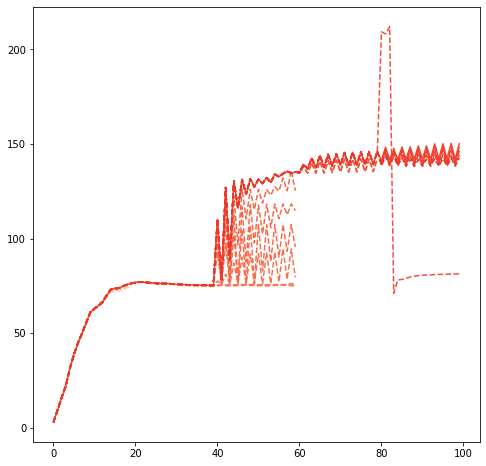

In [15]:
from matplotlib import cm
tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    score = tm.scores['BleiLaffertyScore']
    ls = "-" if tm.model_id == best_model.model_id else "--" 
    plt.plot(score, color=cm.Reds(colors[i]), ls=ls)
plt.show()

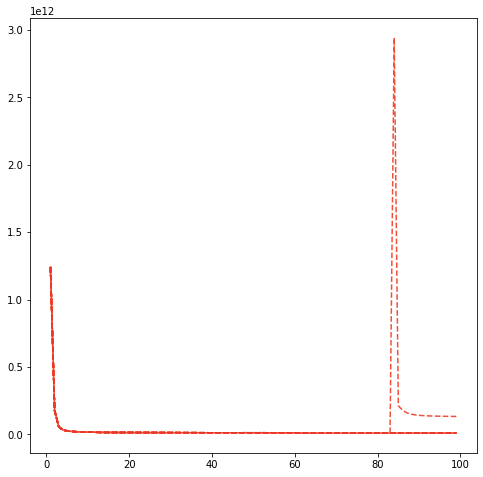

In [16]:
tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    score = tm.scores['PerplexityScore@all']
    score[0] = float("nan")
    ls = "-" if tm.model_id == best_model.model_id else "--" 
    plt.plot(score, color=cm.Reds(colors[i]), ls=ls)
plt.show()

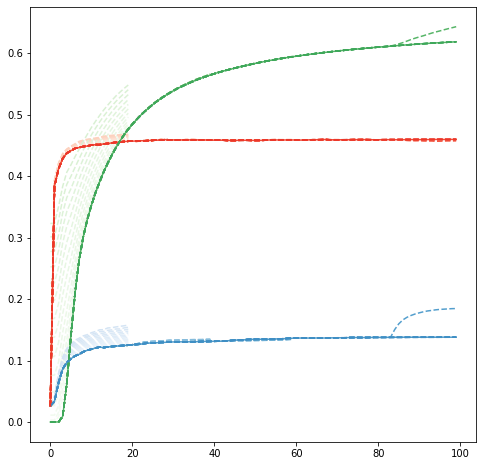

In [17]:
tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    ls = "-" if tm.model_id == best_model.model_id else "--" 
    score = tm.scores['TopicKernel@word.average_purity']
    plt.plot(score, color=cm.Blues(colors[i]), ls=ls)
    score = tm.scores['TopicKernel@word.average_contrast']
    plt.plot(score, color=cm.Reds(colors[i]), ls=ls)
    score = tm.scores['SparsityPhiScore@word']
    plt.plot(score, color=cm.Greens(colors[i]), ls=ls)

plt.show()

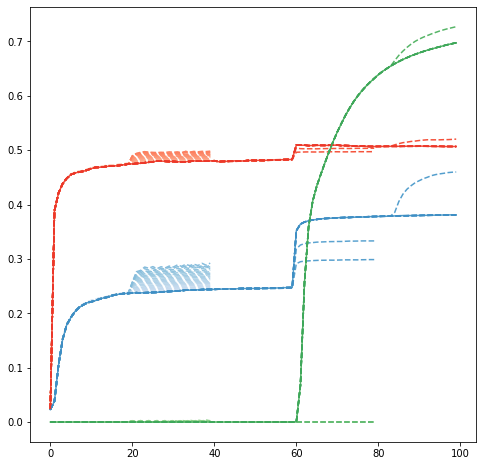

In [18]:
tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    ls = "-" if tm.model_id == best_model.model_id else "--" 
    score = tm.scores['TopicKernel@2gramm.average_purity']
    plt.plot(score, color=cm.Blues(colors[i]), ls=ls)
    score = tm.scores['TopicKernel@2gramm.average_contrast']
    plt.plot(score, color=cm.Reds(colors[i]), ls=ls)
    score = tm.scores['SparsityPhiScore@2gramm']
    plt.plot(score, color=cm.Greens(colors[i]), ls=ls)

plt.show()

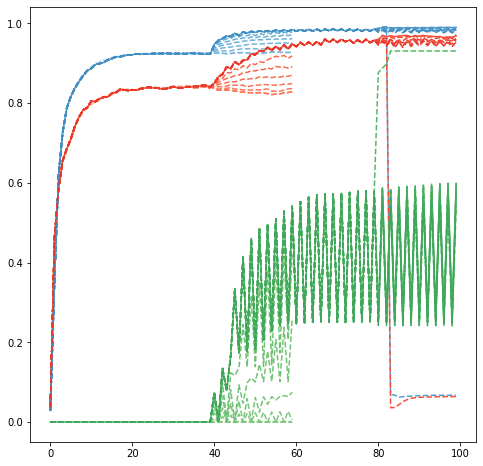

In [19]:
tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))
for i, tm in enumerate(list(tms.values())[1:]):
    ls = "-" if tm.model_id == best_model.model_id else "--" 
    score = tm.scores['TopicKernel@3gramm.average_purity']
    plt.plot(score, color=cm.Blues(colors[i]), ls=ls)
    score = tm.scores['TopicKernel@3gramm.average_contrast']
    plt.plot(score, color=cm.Reds(colors[i]), ls=ls)
    score = tm.scores['SparsityPhiScore@3gramm']
    plt.plot(score, color=cm.Greens(colors[i]), ls=ls)

plt.show()

## Investigate model

In [20]:
from topicnet.viewers.top_tokens_viewer import TopTokensViewer
from topicnet.viewers.top_documents_viewer import TopDocumentsViewer

In [21]:
first_model_top_tok = TopTokensViewer(best_model, num_top_tokens=10, method='phi')
first_model_html =  first_model_top_tok.to_html(first_model_top_tok.view())
first_model_top_doc = TopDocumentsViewer(best_model, dataset=dataset).view()

In [22]:
from IPython.display import display_html, display
from topicnet.cooking_machine.dataset import get_modality_vw


n=None
for line, topic_docs in list(zip(first_model_html, first_model_top_doc))[:n]:
    display_html(line, raw=True)
    for doc_id in topic_docs:
        doc_vw = dataset.get_vw_document(doc_id).values[0][0]
        doc_title = get_modality_vw(doc_vw, "@title")
        doc_snippet = get_modality_vw(doc_vw, "@snippet")
        display_html(f"<b>{doc_title}</b><br />{doc_snippet}", raw=True)

,topic_0 @2gramm
политический_философия,0.02101
политический_теория,0.00914
крайний_мера,0.0074
xx_век,0.00736
речь_идти,0.00641
лео_штраус,0.00567
политический_мысль,0.00563
политический_философ,0.00561
научный_революция,0.00507
политический_режим,0.00502


faq«государь» макиавелли 6 фактов об одном из главных политических философов

тирания в античной политической философии философ александр павлов о значении худшего политического режима в трудах платона, ксенофонта и аристотеля

политическая философия эроса о понятии эроса и эрота в дискуссии о тирании у платона, ксенофонта и аристотеля, идеальном правителе и высшей форме страсти

тирания у платона философ александр павлов о политической философии платона, понимании тирании в диалогах «государство» и «законы» и идеальном политическом режиме

главы # превратности политической субъективации отрывок из новой книги «щекотливый субъектотсутствующий центр политической онтологии» известного словенского философа славоя жижека

главымеханицизм. декарт конструирует вселенную отрывок из книги «научная революция как событие» историков науки питера деара и стивена шейпина о появлении науки в ее современном понимании

faqалмазное правило этики 7 фактов о дополнении к золотому правилу нравственности

тирания у ксенофонта философ александр павлов о диалоге «гиерон», философии ксенофонта в работах лео штрауса и проекте добродетельной тирании

главы # свобода слуг и свобода граждан отрывок из книги знаменитого итальянского политического философа маурицио вироли «свобода слуг»

5 книг о философии войны что читать о сущности, смысле и природе войны, рекомендует философ арсений куманьков

,topic_1 @2gramm
нобелевский_премия,0.01695
нитрид_бора,0.01051
органический_химия,0.00916
кристаллический_структура,0.00876
углеродный_нанотрубка,0.00833
высокий_давление,0.00745
высокий_температура,0.00741
магнитный_пол,0.00615
химический_связь,0.0057
новый_материал,0.00538


новая химия под высоким давлением химик артем оганов об изменении химических связей элементов, эксперименте с давлением натрия и источнике нагрева ядра земли

материалы из мира низкой размерности химик артем оганов об углеродных нанотрубках, дизайне новых материалов и нанотехнологиях древнего мира

методы предсказания кристаллических структур химик артем оганов о задачах кристаллографии, методе uspex и структуре алмаза

композиты с использованием bn-нанотрубок материаловед дмитрий гольберг о наноструктурах из нитрида бора, графеноподобных материалах и улучшении свойств полимеров

дизайн сверхтвердых материалов химик артем оганов о структуре алмаза, применении сверхтвердых материалов и новых формах углерода

«создать материал тверже алмаза принципиально невозможно» интервью с химиком артемом огановым о компьютерном дизайне новых материалов, искусственном интеллекте и самом твердом в мире материале

квазикристаллы химик артем оганов о структуре кристалла, открытии нового состояния вещества и мозаиках пенроуза

гетероциклические циркулены химик валентин ненайденко об органической химии, красоте молекул и «серных цветках»

водородные топливные элементыот полетов «аполлона» до автомобилей об одном из самых многообещающих альтернативных источников энергии, водородном гибридном автомобиле toyota mirai и защите окружающей среды

нанотрубки из углерода и нитрида бора материаловед дмитрий гольберг об истории открытия нанотрубок, преимуществах нитрида бора и теплопроводности

,topic_2 @2gramm
xix_век,0.01572
xx_век,0.01481
ближний_восток,0.00931
христианский_восток,0.00821
северный_кавказ,0.00716
конец_xix,0.00578
vii_век,0.00577
гражданский_война,0.0051
речь_идти,0.00486
iv_век,0.00475


государства сапотеков и миштеков историк дмитрий беляев о культе предков, стенах черепов и археологических исследованиях в долине оахаки

первая империя мезоамерики историк дмитрий беляев об организации пространства теотиуакана, городском быте и особенностях культурной экспансии

faqпарадокс конкисты 7 фактов о главных задачах и особенностях испанского завоевания америки

культура грузинского христианства историк алексей муравьёв об истоках картвельского христианства, армазской билингве и особенностях грузинской письменности

история древней мезоамерики 10 лекций историка дмитрия беляева о становлении мезоамериканской цивилизации, ее культуре и политической жизни

культура нубийского христианского царства историк алексей муравьёв об истории нубии, христианизации африканского рога и грамматике нубийского языка

ранние земледельцы мезоамерики историк дмитрий беляев об этапах заселения мезоамерики, истории кукурузы и культуре алкогольных напитков

главыбильгамес в истории отрывок из книги «гильгамеш. биография легенды» шумеролога владимира емельянова о роли фигуры гильгамеша в мировой истории и культуре

5 книг по африканистике что читать о культуре, политике и экономике африки, рекомендует кандидат исторических наук александра архангельская

христианская культура кавказской албании историк алексей муравьёв о народах кавказской албании, армянском влиянии на местную традицию христианства и удинском языке

,topic_3 @2gramm
мировой_война,0.02113
xviii_век,0.01666
французский_революция,0.01554
xix_век,0.01166
российский_империя,0.01045
веймарский_республика,0.00826
xvii_век,0.00787
речь_идти,0.00634
екатерина_ii,0.00577
католический_церковь,0.00573


левый терроризм в германии историк илья женин о студенческих протестах 1968 года, «фракции красной армии» и трагических событиях «немецкой осени»

5 книг по истории германии в хх веке что читать об историческом развитии германии от веймарской республики до современности, рекомендует кандидат исторических наук илья женин

начало французской революции историк дмитрий бовыкин о движении санкюлотов, конституции 1791 года и псевдонаучных открытиях жан-поля марата

веймарская республика историк илья женин о республике без республиканцев, октябрьской революции и социал-демократической партии

главы # дискуссия о сущности террора отрывок из книги «русское общество в зеркале революционного террора. 1879–1881 годы» историка юлии сафроновой

якобинский террор историк дмитрий бовыкин о массовых арестах в период французской революции, декретах национального конвента и теории обстоятельств в историографии

главы # тыл в первую мировую отрывок из книги «первая мировая войнакатастрофа 1914 года» британского историка макса хейстингса о быте мирного населения воюющих стран

репрессивный аппарат третьего рейха историк илья женин об антисемитской политике, хрустальной ночи и лагерях смерти в нацистской германии

«национал-социализм сыграл роковую роль в воспитании немецкого духа» интервью с историком ильей жениным о веймарской республике, советско-германских отношениях и немецком коллективизме

объединение германии историк илья женин о перестройке в ссср, падении берлинской стены и последствиях объединения гдр и фрг

,topic_4 @2gramm
римский_право,0.03223
право_собственность,0.01539
индоевропейский_язык,0.01534
обычный_право,0.01138
языковой_семья,0.01116
дать_случай,0.01006
правовой_система,0.00899
общий_право,0.00831
римский_юрист,0.00802
древний_рим,0.00712


faqрецепция римского права 7 фактов о заимствовании норм римской правовой системы

правовые последствия смешения вещей юрист денис новак о смешении однородных вещей, праве собственности на такое имущество и кондикционном иске

главы # в поисках родины отрывок из книги «генетическая одиссея человека» антрополога и популяционного генетика спенсера уэллса

кондикция владения юрист денис новак о защите при неправомерном лишении владения, виндикационном и кондикционном исках и ценности владения имуществом

юриспруденция в древнем риме периода принципата историк права дмитрий полдников о римском праве как «искусстве доброго и справедливого», этапах развития юриспруденции и модельных казусах

фидуциарные отношения юрист дмитрий дождев о привилегиях кредитора, англо-американском трасте и фидуции в германском праве

faqдобросовестность 5 фактов об одном из важнейших наследий римского права и его современном понимании

источники римского права историк александр марей о понятии «плебисцит», конституциях императоров и праве ответа

почему важно изучать право? об отношениях должника и кредитора, проблеме навязанного обогащения и правотворческой роли судов

вещные права юрист дмитрий дождев о понимании права собственности, феодальной системе имущественных прав и узуфрукте

,topic_5 @2gramm
советский_союз,0.01871
мировой_война,0.01669
гражданский_война,0.01389
политика_память,0.00958
советский_власть,0.00929
русский_формализм,0.00755
русский_литература,0.00614
красный_армия,0.00589
речь_идти,0.00588
xx_век,0.00522


главысталин на войне отрывок из книги «сталин. жизнь одного вождя» историка олега хлевнюка о роли сталина в поражениях и победах в великой отечественной войне

главыавторские тексты сталина отрывок из книги «сталин, коба и сoco» историка ольги эдельман о дореволюционных текстах будущего вождя и воспоминаниях его современников

«первая мировая война потеряна, у нас нет ее в памяти» интервью с историком алексеем миллером о политике памяти, войне 1812 года и значении «георгиевской ленточки»

эпоха сталина 11 материалов историка олега хлевнюка о зарождении и гибели сталинской эпохи, проблемах ее интерпретации и значении для мировой истории

«сталин, коба и сосо. молодой сталин в исторических источниках» историк ольга эдельман о дореволюционной биографии сталина, проблеме верификации источников и задачах исторического исследования

приход сталина к власти историк олег хлевнюк о системе коллективного руководства после смерти ленина, заявлении сталина об отставке и полном контроле над органами госбезопасности

практики построения личности в утопических сообществах как педагогические технологии влияли на жизнь советских детей и подростков

главыинтерпретации сталинградской битвы отрывок из книги «сталинградская битвасвидетельства участников и очевидцев», вышедшей под редакцией историка йохена хелльбека

большой террор историк олег хлевнюк о причинах репрессий 1937 года, антисоветских элементах и роли сталина в большом терроре

предпосылки десталинизации историк олег хлевнюк о проблемах послевоенного ссср, демонтаже гулага и наследии сталинского режима

,topic_6 @2gramm
естественный_отбор,0.01701
половый_отбор,0.00884
процесс_эволюция,0.00708
теория_эволюция,0.00694
живой_организм,0.0068
пермский_период,0.00633
поведение_животное,0.00623
человекообразный_обезьяна,0.00598
homo_sapiens,0.00582
летучий_мышь,0.00566


архат абжанов«строение черепа птицы унаследовали от динозавров» биолог архат абжанов об эволюции птиц, строении их черепа и общих чертах с крокодилами

особенности строения голосеменных класса войновскиевых о спорных вопросах в изучении одной из самых своеобразных групп голосеменных растений, произраставших на земле в конце палеозойской эры

варвара веденина"половой отбор не всегда противоречит естественному" интервью с биологом варварой ведениной о гипотезах, объясняющих выбор самок, и генетической детерминации механизмов полового отбора

прямая речьжанна резникова этолог, доктор биологических наук о поведении животных, их когнитивных способностях, этике и гражданской позиции ученых

faqпермский период 7 фактов о периодизации пермской геологической системы

пермский период палеоботаник сергей наугольных о возникновении пермской системы, эпохе высокого стояния континентов и пермо-триасовом вымирании видов

«многие юрские животные продолжили свое развитие и даже имеют потомков в наше время» палеонтолог чжунхэ чжоу о многообразии удивительных животных юрского периода

5 книг о палеоботанике пермского периода что читать об ископаемых растениях пермского периода, рекомендует доктор геолого-минералогических наук сергей наугольных

половой отбортеория против практики биолог варвара веденина о действии естественного отбора, турнирах между самцами и преподнесении подарков у насекомых

палеоботаника палеоботаник сергей наугольных об истории дисциплины, главных открытиях и ее связи с палеозоологией

,topic_7 @2gramm
квантовый_компьютер,0.01544
магнитный_поль,0.01301
длина_волна,0.01134
магнитный_пол,0.00973
квантовый_точка,0.00828
квантовый_технология,0.00795
квантовый_механика,0.00764
электромагнитный_волна,0.00702
молекулярный_машина,0.0063
ядерный_энергетика,0.00592


faqквантовые интерфейсы 7 фактов об устройствах, позволяющих соединять два разных квантовых объекта друг с другом

что придет на смену кремниевой электронике? физик алексей орлов о проблеме тепловыделения, попытках найти альтернативы кремнию и клеточных автоматах на квантовых точках

эффект переноса спина в спинтронике физик константин звездин о технологических проблемах наноэлектроники, магнитном вихре и генераторе свч-излучения

faqтехнологии производства биотоплива микробиолог зоригто намсараев о биотопливной индустрии и факторах, которые определяют прибыльность того или иного сырья

«квантовая телепортация используется для передачи секретной информации, которую невозможно украсть» интервью с физиком юджином ползиком о современном понимании идеи телепортации, сериале «star trek» и принципах квантовой криптографии

незатухающие токи в металлических кольцах физик андрей семенов о сверхпроводящих кольцах, куперовских парах и многочастичных системах

faqатомная энергетика сегодня 7 фактов о перспективах развития атомной промышленности в современном мире

faqядерный магнитный резонанс 5 фактов о природе магнитных полей, спектре ядерного магнитного резонанса и применении метода ямр в современной химии

точка зрениягенетически модифицированные организмы мнения экспертов постнауки о влиянии гмо на сельское хозяйство, научные исследования и общество

конденсация экситонных поляритонов физик наталия берлофф о квантовом давлении, свойствах поляритонов и эффекте квантовой блокады

,topic_8 @2gramm
стволовой_клетка,0.02826
раковый_клетка,0.01422
иммунный_система,0.01081
опухолевый_клетка,0.00869
метод_лечение,0.00855
сахарный_диабет,0.00726
продолжительность_жизнь,0.00714
клинический_испытание,0.00704
сигнальный_путь,0.0068
костный_мозг,0.00674


faqэмбриональные стволовые клетки 7 фактов об уникальном типе плюрипотентных клеток млекопитающих

новые технологии в лечении болезней зрения биолог сергей киселев об амаврозе лебера, возрастных заболеваниях глаз и трансплантации эмбриональных стволовых клеток

прямая речьсергей киселев об изучении стволовых клеток, опасности клонирования мамонта и состоянии отечественной науки

как пациенту пересадили сетчатку глаза из «искусственных» клеток? о получении индуцированных плюрипотентных стволовых клеток и их применении в медицине

вич-ассоциированное поражение миокарда и способы его защиты способен ли антиоксидант процистеин предотвращать развитие вич-индуцированной кардиомиопатии

кроветворные стволовые клетки биолог джеральд де хаан об образовании крови, трансплантации костного мозга и лечении гемофилии

press-лекция # как сделать из одной клетки другуюхроники трансформаций генетик мария шутова о выращивании органов, культивировании ранних эмбриональных клеток и о биомедицинском применении их искусственных аналогов

эпигенетика и клонирование биолог рудольф йениш об овце долли, терапевтическом клонировании у млекопитающих и перепрограммировании клеток

faqлабораторные исследования вич-инфекции 7 фактов об изучении вируса иммунодефицита человека в контролируемых условиях

старение кроветворных стволовых клеток биолог джеральд де хаан о функционировании стволовых клеток, технологии омоложения и геномных мутациях

,topic_9 @2gramm
элементарный_частица,0.03435
стандартный_модель,0.03326
бозон_хиггс,0.02585
тёмный_материя,0.01392
хиггсовский_бозон,0.01185
электрический_заряд,0.01112
сильный_взаимодействие,0.01047
слабый_взаимодействие,0.00963
высокий_энергия,0.0096
космический_луч,0.00944


симметрии в мире элементарных частиц физик дмитрий казаков о типах преобразований в физике частиц, лоренц-инвариантности и нарушениях симметрии

спонтанное нарушение симметрии физик дмитрий казаков о массах частиц, слабых взаимодействиях и теореме голдстоуна

faqстандартная модель 7 фактов об одной из самых совершенных теорий современной физики

faqтоп-кварк 7 фактов о наиболее массивной частице стандартной модели

три поколения кварков физик михаил данилов о гипотезе поля дирака, стандартной модели и японской фабрике «прелести»

адроны физик дмитрий казаков о мире мезонов и барионов, свойствах кварков и адронных резонансах

faqcp-нарушение в кварках 7 фактов о смешивании поколений кварков, экспериментах на бак и асимметрии в мире элементарных частиц

линейный коллайдер физик михаил данилов о недостатках стандартной модели, изучении t-кварка и поиске новых измерений

антиоксиданты и сердечно-сосудистые заболевания фармаколог олег медведев о компонентах антиоксидантной системы, формах коэнзима и новых свойствах водорода

стандартная модель физик михаил данилов об экспериментах на коллайдерах, массе фундаментальных частиц и суперсимметрии

,topic_10 @2gramm
социальный_жизнь,0.00996
социальный_взаимодействие,0.00964
повседневный_жизнь,0.00895
иммунный_система,0.00888
социология_повседневность,0.00797
старший_возраст,0.00764
теория_фрейм,0.00754
материальный_объект,0.00724
король_артур,0.00701
социальный_роль,0.00624


автограф # «социология повседневности и теория фреймов» социолог виктор вахштайн рассказывает, в чём ценность теории фреймов, как развивается фрейм-анализ и о том, от чего стоит воздерживаться учёному

к теории подозрения социолог виктор вахштайн объясняет, что общего у карла маркса и обитателей петербургской коммуналки

5 книг по основам микросоциологии классические работы, сформировавшие микросоциологию как дисциплину, рекомендует социолог михаил соколов

к социологической «теории относительности» события шредингерапример блефа в игре в покер

5 книг о либерализации старения что читать об изучении пожилого возраста, рассказывает директор центра методологии федеративных исследований ранхигс дмитрий рогозин

понятие фрейма у гоффмана социолог михаил соколов о фрейм-анализе, социальных ролях и театральных метафорах в описании социальной жизни

порядок интеракции социолог михаил соколов о роли повседневной жизни, системе взаимодействий «лицом к лицу» и функционировании больших социальных систем

действующие вещи социолог виктор вахштайн объясняет, как материальные объекты конституируют социальные взаимодействия

введение в микросоциологию 11 лекций социолога михаила соколова о социологических исследованиях повседневных взаимодействий

стратегические интеракции социолог михаил соколов о субъектах стратегического взаимодействия, разновидностях поступков и теории культурной эволюции

,topic_11 @2gramm
массовый_культура,0.02381
культовый_кино,0.01014
cinema_studies,0.00942
речь_идти,0.00802
общество_потребление,0.00762
критический_теория,0.00696
xx_век,0.00685
молодёжный_субкультура,0.0058
плохой_кино,0.00543
крайний_мера,0.00535


гендерные исследования в cinema studies философ александр павлов о методах психоанализа в cinema studies, образе «последней девушки» и анализе кинематографа с позиций феминизма

главы # скрытые механизмы идеологии в "бойцовском клубе" отрывок из книги «постыдное удовольствиефилософские и социально-политические интерпретации массового кинематографа» философа александра павлова

5 книг по расоведению что читать о современных достижениях расоведения и происхождении человеческих рас, рекомендует кандидат биологических наук станислав дробышевский

штурмуя публичное пространствослова о гетеротопии плохого вкуса философ александр павлов о теории кэмпа сьюзен сонтаг, русской традиции кинокритики и утопии хорошего вкуса

автограф # «происхождение человеческих рас» станислав дробышевский рассказывает о своей книге, первой из цикла, посвященного происхождению рас

феномен happy end культуролог екатерина лапина-кратасюк о популярном кинематографе, фильмах жанра нуар и «кошмаре на улице вязов»

faqдокументальное театроведение 5 фактов о театральной историографии, архивных исследованиях и методологии науки о театре

5 книг о культовом кинематографе что читать о культовом кино, рекомендует доцент философского факультета ниу вшэ александр павлов

cinema studies 8 лекций философа и культуролога александра павлова о современных подходах к исследованию кинематографа

трансформации локальной культуры философ владимир миронов о глобальном коммуникационном пространстве, противостоянии высокой и массовой культуры и оппозиции «свой — чужой»

,topic_12 @2gramm
нервный_клетка,0.02724
нервный_система,0.0189
головной_мозг,0.01304
человеческий_мозг,0.00941
работа_мозг,0.00894
нейронный_сеть,0.00756
орган_чувство,0.00735
флуоресцентный_белка,0.00722
потенциал_действие,0.00635
структура_мозг,0.00551


страхпричины, механизмы и рефлексы 5 фактов о физиологических основаниях и исследованиях страха

главы # собирание воспоминаний отрывок из книги «коннектом. как мозг делает нас тем, кто мы есть» профессора mit себастьяна сеунга

faqкомандные нейроны 5 фактов о различных функциях клеток в нервной системе

главы # выживаниемозг человека тоже эволюционировал отрывок из книги «правила мозга» молекулярного биолога джона медины

faqнейрогибридные системы 7 фактов об изучении нейронов в чашке петри

экспериментальная генетика поведения биолог инга полетаева о модельных животных, искусственном отборе и селекционных экспериментах

faqфизиология эмоций 6 фактов о возникновении эмоций, их воздействии на организм и здоровье человека

функции взрослых нейронов в мозге нейробиолог александр лазуткин о миграции нейронов, значении области гиппокампа и инфантильной амнезии

индивидуальность нейронов и синаптическая конкуренция нейробиолог джефф лихтман о нервно-мышечных синапсах, соединении аксонов и методе брэйнбоу

5 мифов о мозге эксперты постнауки развенчивают мифы об особенностях нашей нервной системы

,topic_13 @2gramm
чёрный_дыра,0.06469
нейтронный_звезда,0.0421
солнечный_система,0.01019
белый_карлик,0.00931
белых_карлик,0.00917
планетный_система,0.00828
звёздный_скопление,0.00766
компактный_объект,0.00761
магнитный_поль,0.00677
млечный_путь,0.00651


черные дыры в центрах галактик астрофизик ольга сильченко об открытии сверхмассивной черной дыры в туманности андромеды, исследованиях джона корменди и темных гравитирующих телах

главы # как все начиналось отрывок из книги «двигатели гравитации. как черные дыры управляют галактиками, звездами и жизнью в космосе» директора астробиологической обсерватории при колумбийском университете в нью-йорке kалеба шарфа

как были открыты черные дыры промежуточной массы? о методах определения массы черной дыры и загадке ультрамощных рентгеновских источников

ударные волны вблизи компактных объектов астрофизик валерий сулейманов о нейтронных звездах, гравитации на космических кораблях и ньютоновском пределе

будущее экзопланетных исследований астрофизик сергей попов о поиске жизни на экзопланетах, международных космических проектах и наземных телескопах нового поколения

обнаружена самая яркая нейтронная звезда о пределе эддингтона, ультраярких рентгеновских источниках и тесных двойных системах

черные дыры физик эмиль ахмедов об изучении черных дыр, карле шварцшильде и гигантских черных дырах

что нового открыли в космосе астрофизик сергей попов о внегалактической астрономии, исследованиях экзопланет и теориях гравитации

faqшаровые скопления 7 фактов об огромных и древних звёздных городах

магнитары астрофизик сергей попов о гамма-всплесках, сильных магнитных полях и рентгеновских пульсарах

,topic_14 @2gramm
центральный_банк,0.0135
промышленный_революция,0.01266
экономический_рост,0.01217
государственный_долг,0.00899
центральный_банка,0.00885
мировой_экономика,0.00835
развивающийся_страна,0.00823
развитый_страна,0.00734
финансовый_рынок,0.00669
рабочий_место,0.00651


главы # от пузыря к пузырю отрывок из книги «линии разломаскрытые трещины, все еще угрожающие мировой экономике» профессора чикагского университета рагурама раджана

экономические колебания экономист сергей афонцев о причинах роста и спада экономики, экономическом кризисе и несостоятельности теорий экономических циклов

главы # инфляция и гиперинфляция глава из книги "развязка. конец долгового суперцикла и его последствия" финансистов джона молдина и джонатана теппера

главы # жиры и внимание к онкологическим заболеваниям отрывок из книг "китайское исследование" профессора биохимии колина кэмпбелла

эволюция центральных банков и денежно-кредитного регулирования экономист сергей дубинин об истории становления банковской системы в мире, кризисах хх века и перспективах экономики россии

faqнеформальность на рынке труда 6 фактов об интенсификации миграции и проблеме сопоставления заработков между разными секторами труда

великая депрессия историк юрий рогулёв об антикризисных мерах рузвельта, зарождении социального законодательства в сша и спаде американской экономики в 1930-х годах

главы # дефицит демократии отрывок из книги «по ту сторону невидимой рукиоснования новой экономической науки» старшего экономиста всемирного банка каушика басу

центральные банкизадачи и функции 5 фактов о деятельности важнейшего финансового института

главыработа и безработица отрывок из книги "как работает экономика" экономиста ха-джун чанга о роли работы и безработицы в глобальном мире

,topic_15 @2gramm
xix_век,0.01008
традиционный_культура,0.00905
греческий_миф,0.00866
греческий_мифология,0.00739
чёрный_мор,0.00578
массовый_культура,0.00477
последний_десятилетие,0.00447
дать_случай,0.00404
древний_греция,0.00402
устный_традиция,0.0039


faqдетский фольклор 7 фактов об истории возникновения, сюжетах и формах детской мифологии

faqтеория речевых актов 5 фактов об аналитической теории речепорождения и понимании произведений художественной литературы

принцип «намеренной небрежности» в дендизме филолог ольга вайнштейн о впечатлении спонтанности в облике денди, поведении джентльменов в обществе и приеме table talk

теория речевых актов филолог гасан гусейнов о седьмом письме платона, четырех фазах познания и чтении стихов

faqэрос в античной культуре 7 фактов об одном из самых загадочных персонажей греческой мифологии

faqлогика мифа 7 фактов о тайне мироздания, к которой человек приобщается через миф

магические заговоры в постсоветской россии фольклорист михаил алексеевский о традиционной крестьянской магии, адаптации магических текстов и влиянии западной эзотерики

образ женщины в русских сказках фольклорист варвара добровольская о двух типах сказочных героинь, идеале женщины и происхождении бабы-яги

5 книг о сравнительной мифологии что читать о компаративном изучении мифологий, рекомендует доктор филологических наук сергей неклюдов

древнегреческие мифы о душе филолог гасан гусейнов о создании первых людей, свойствах души и ящике пандоры

,topic_16 @2gramm
гравитационный_волна,0.02071
реликтовый_излучение,0.01821
чёрный_дыра,0.01609
тёмный_энергия,0.01422
ранний_вселенная,0.01366
теория_струна,0.0136
расширение_вселенная,0.01099
тёмный_материя,0.0102
скопление_галактика,0.01016
космологический_постоянный,0.00884


поляризация реликтового излучения физик дмитрий горбунов об эксперименте bicep2, стадии инфляции и развитии теории гравитации

что изменит открытие первичных гравитационных волн? астрофизик сергей попов о теории инфляции, поиске первичных гравитационных волн и заявлении коллаборации bicep

поиск первичных гравитационных волн физик алексей старобинский о перспективах открытия гравитационных волн, инфляционной теории ранней вселенной и скалярных возмущениях

реликтовое излучение астроном лайман пейдж о развитии теории горячего большого взрыва, дипольной компоненте и зондировании вселенной до самых ранних эпох

faqвселенная до горячей стадии 5 фактов о теориях развития вселенной, инфляционной модели и гравитационных волнах

стандартная космологическая модель астрофизик олег верходанов об угловом спектре мощности, холодной темной материи и измерении космологических параметров

главы # миф и реальность фрагмент из книги немецкого писателя и популяризатора науки хуберта мания "стивен хокинг"

точная космология физик макс тегмарк о флуктуациях в ранней вселенной, темной энергии и теории инфляции

вселенная до горячей стадии физик валерий рубаков о реликтовом излучении, зарождении неоднородностей и гравитационных волнах

роль нейтрино в космологии физик дмитрий горбунов о массе нейтрино, эволюции ранней вселенной и измерении реликтового излучения

,topic_17 @2gramm
принятие_решение,0.02212
система_отсчёт,0.01232
теория_игра,0.012
принимать_решение,0.00806
поведенческий_экономика,0.00469
крайний_мера,0.00448
скорость_свет,0.00439
арабский_страна,0.00435
преобразование_лоренц,0.00428
быстрый_сон,0.00423


главыискаженная демократия отрывок из книги «искаженная демократия» политолога нади урбинати об индивидуальной свободе, открытости политической игры и демократической легитимности

faqспециальная теория относительности 5 фактов об основах и следствиях теории, изменившей физическую науку

понятие поведенческой экономики экономист ксения паниди об идее рациональности, влиянии эмоций на поведение и когнитивных причинах экономических решений

гендерные особенности инсомнии сомнолог михаил полуэктов о различиях инсомнии мужчин и женщин, социальных рисках бессонницы и проявлениях сонных расстройств при неврозах

эмоции в музыкевосприятие расстояний в тональном поле нейропсихолог марина корсакова-крейн о квинтовом круге, улавливании расстояний в тональном пространстве и важности интуиции в восприятии музыки

главыбедность и ребенок до появления на свет отрывок из книги «бедность и развитие ребенка» о том, как социальное неблагополучие влияет на разные аспекты развития ребенка

экономика соблазна экономист ксения паниди о теории перспектив, иллюзии невозвратных потерь и поведении людей в ситуации неопределенности

инсомнияпричины, лечение и виды бессонницы сомнолог михаил полуэктов об острой и хронической бессоннице, методах исследования и гигиене сна

специальная теория относительности физик эмиль ахмедов о преобразованиях лоренца, теореме нётер и global positioning system

faqдизайн экономических механизмов 7 фактов о поиске взаимно-оптимальных стратегий при решении экономических игр

,topic_18 @2gramm
русский_язык,0.05981
английский_язык,0.01069
литературный_язык,0.00971
разный_язык,0.00937
носитель_язык,0.00913
дискурсивный_слово,0.00836
устный_речь,0.00747
германский_язык,0.00666
множественный_число,0.00663
значение_слово,0.00636


«глагольный вид является едва ли не самым сложным для изучения» интервью с лингвистом алексеем шмелевым о предмете изучения аспектологии, ошибках в употреблении глаголов и сложностях русской грамматики

русский диалектный консонантизм лингвист игорь исаев о твердости/мягкости согласных, особенностях артикуляции в говорах и методах фонетического анализа речи

двувидовые глаголы лингвист александр пиперски об особенностях глаголов совершенного и несовершенного вида, интеграции в русский язык заимствованных глаголов и видовых противоречиях в русских словарях

гласные русского языка лингвист игорь исаев об истории гласных в литературном языке, следах утраченных букв и особенностях говоров

германские языки лингвист александр пиперски о глагольной системе, фонетике и синтаксисе германских языков

«диалектные черты имеют глубокую историю, но до сих пор сохраняются носителями, живущими в деревнях» интервью с лингвистом игорем исаевым о диалектных особенностях северного наречия русского языка

архитектура грамматики лингвист екатерина лютикова об уровневых моделях языка, значении синтаксиса и генеративной лингвистике

научная классификация и естественный языкпроблема орехов лингвист борис иомдин о бытовом и словарном определении «орехов» и формировании нового класса слов

теория фразеологии лингвист анатолий баранов о типах фразеологизмов, задачах фразеографии и ментальном лексиконе человека

лексическая сочетаемость лингвист александр пиперски о парадоксальных словосочетаниях, модели мешка слов и использовании логарифмов в лингвистике

,topic_19 @2gramm
средний_век,0.02294
xiii_век,0.01232
католический_церковь,0.01207
xii_век,0.01204
древний_русь,0.00882
христианский_имя,0.00769
фома_аквинский,0.00762
русский_князь,0.0075
xv_век,0.00702
священный_писание,0.00639


faqсредневековая иудео-христианская полемика 7 фактов о развитии диалога между христианством и иудаизмом и публичных диспутах средневековья

faqнемецкая классическая философия как понятие 6 фактов о собраниях текстов, отцах-основателях и ошибочном представлении о понятии

главыстроительство церкви и его интерпретации отрывок из книги медиевиста ирины галковой «церкви и всадники. романские храмы пуату и их заказчики» о становлении в европейской культуре феномена родовой церкви

телесность власти в средние века историк михаил бойцов о качествах тела правителя, знаках власти и трупном синоде

средневековые ведовские процессы историк ольга тогоева об иллюзиях демонов, договоре с дьяволом и материальности колдовства

«ритуалы — это и есть власть» интервью с историком михаилом бойцовым об обряде средневековой коронации, практике помазания и статусе королевской власти в европе

вступление правителя в его город историк михаил бойцов о легитимации власти в средневековье, образе государя как иисуса христа и традициях встречи горожанами своего правителя

5 книг о мифологизации жанны д'арк что читать об образе жанны д'арк в культуре, рекомендует кандидат исторических наук ольга тогоева

«божественная комедия» данте алигьери ад данте, классификация грехов, догмат о чистилище и архетип возвышенной любви

немецкая классическая философия как понятие философ петр резвых о преемственности, интеллектуальном ландшафте эпохи и освоении рукописного наследия

,topic_20 @2gramm
искусственный_интеллект,0.02401
нейронный_сеть,0.01545
социальный_сеть,0.01375
программный_обеспечение,0.01059
база_дать,0.00854
машинный_обучение,0.00805
анализ_дать,0.00723
компьютерный_наука,0.00687
язык_программирование,0.0055
оперативный_память,0.00534


дэвид вернон«то, что мы называем искусственным интеллектом, им не является» специалист по искусственному интеллекту дэвид вернон об истории создания ии, компьютерном зрении и способности роботов к самообучению

«компьютерные науки исследуют что-то идеальное, чего в реальном мире может физически не присутствовать» интервью с программистом станиславом протасовым об особенностях компьютерных наук, параллельном программировании и искусственном интеллекте

создана нейронная сеть, работающая по принципу машины тьюринга об архитектуре фон неймана, машине тьюринга и проверке работоспособности

история суперкомпьютерного моделирования 5 фактов о зарождении компьютерной эры, вычислительных методах и системах с распределенной памятью

компиляторы для языков программирования программный архитектор евгений зуев о разработке компиляторов, языке с++ и семантическом зазоре

технология ухода от баз данных в программировании инженер антон чижов о преимуществах оперативной памяти, способах хранения данных и системе «апрентис»

как обучить нейросеть понимать смысл текста программы? о машинном обучении, отличии формальных языков от естественных и обучающих выборках

механизмы управления репутацией в социальных сетях специалист по компьютерным наукам джу йонг ли об анализе социальных сетей, институте репутации и феномене дружбы в facebook

разработка корпоративных информационных систем информатик сергей зыков о возникновении программной инженерии, сложности корпоративных систем и развитии технологий

сознание машин специалист в области искусственного интеллекта максим таланов о связи сознания и понимания, машинном обучении и суперкомпьютерах ibm

,topic_21 @2gramm
молекула_днк,0.0151
генетический_информация,0.01106
живой_организм,0.00885
последовательность_днк,0.00681
кишечный_палочка,0.00681
двойной_спираль,0.0068
структура_днк,0.00621
генный_инженерия,0.00612
молекулярный_биология,0.0058
участок_днк,0.0057


необычные формы днк биофизик максим франк-каменецкий о двойной спирали рнк, неканонических формах днк и условиях их образования

элементарная хроматиновая фибрилла биолог евгений шеваль о фиксации компонентов живой клетки, искусстве замораживания молекул и нуклеосомной фибрилле

эволюция вируса гриппа биолог георгий базыкин о вакцине от гриппа, антигенном дрейфе и синтезированном штамме птичьего гриппа

геномная медицина микробиолог константин северинов о природе генных болезней, технологии редактирования генома crispr/cas9 и репарации днк

сенсорные системы цианобактерий 6 фактов о бактериях, изменивших состав атмосферы земли в прошлом, и их современном изучении

faqчистые культуры 7 фактов об открытии роберта коха, изменившем современную микробиологию

зонд на основе днк измеряет силу между клеткой и поверхностью о флуоресцентных молекулах, взаимодействии клеточной мембраны с внешней средой и измерении силы в несколько пиконьютонов

повреждения днк биофизик максим франк-каменецкий о мутациях генома, королеве виктории и болезни тея — сакса

гриппэволюция вируса и универсальная вакцина биолог георгий базыкин о возникновении эпидемий гриппа, причинах эволюции вируса, поисках универсальной вакцины и опасности штамма свиного гриппа (h1n1)

определение последовательности днк биофизик максим франк-каменецкий о чтении последовательностей днк, гель-электрофорезе и секвенировании генома человека

,topic_22 @2gramm
когнитивный_психология,0.01215
решение_задача,0.01189
творческий_мышление,0.00788
долговременный_память,0.00616
решать_задача,0.00592
собственно_говорить,0.00574
умственный_способность,0.00549
прошлое_опыт,0.00524
движение_глаз,0.00514
кратковременный_память,0.00496


«мы не замечаем, сколь многого мы не замечаем» интервью с психологом марией фаликман о когнитивных науках, великой иллюзии сознания и кратковременной памяти

процессы и виды памяти психолог мария фаликман о месте памяти в системе психических процессов, ее возможных целях и подсистемах

виды мышления психолог мария фаликман об особом подходе к исследованию мышления в психологии, различиях между теоретическим и практическим мышлением и имеющихся классификациях

faqмышление в психологическом исследовании 7 фактов о методах исследования способов, которыми мы решаем задачи и проблемы

методы изучения категорий у детей психолог алексей котов о способности к категоризации, ее изучении и зрительных предпочтениях детей

явление и понятие инсайта психолог владимир спиридонов об этапах решения задачи, ошибках переживания и психологических экспериментах

психология решения личностных проблем психолог наталья кисельникова о понятии «проблема», способностях к решению и профессиональной помощи

зрительная память психолог игорь уточкин об экспериментах с памятью, зрительных образах и ложных воспоминаниях

возможности и ограничения зрительной памяти психолог игорь уточкин о долговременной и краткосрочной памяти, экспериментах с запоминанием вещей и событий и объеме хранения

психология создания трудностей и проблем психолог александр поддьяков о различных типах трудностей, их нравственной оценке и разработке игр

,topic_23 @2gramm
социология_право,0.01368
национальный_государство,0.00937
xvii_век,0.00798
речь_посполить,0.00742
соединить_штат,0.00698
xviii_век,0.00686
тёмный_материя,0.0063
политический_партия,0.00608
российский_империя,0.00575
мировой_война,0.00561


стрелецкие бунты историк александр лаврентьев о бунте 1682 года, царевне софье и утре стрелецкой казни

главы # гражданство и национальность отрывок из книги «культурные различия и политические границы в эпоху глобальных миграций» политолога владимира малахова

россия и казацкая украина 7 фактов о казацких восстаниях, взаимоотношениях казачества с польшей и вхождении украины в состав россии

главыновые войны и политика отрывок из книги «новые и старые войны» политолога мэри калдор о новом типе организованного насилия

faqэтнические феномены 5 фактов о примордиалистском и конструктивистском взгляде на конструирование этнической идентичности

«итальянские корни» советской теории этноса как проходило становление российской этнологии и развитие дискуссий о народе, этносе и этничности в советский период

россия и казацкая украина историк кирилл кочегаров об истории запорожской сечи, восстании богдана хмельницкого и угасании казацкой автономии

главы # дело «сибирских сепаратистов» отрывок из книги «сибирь в составе российской империи»

политика идентичности в постсоветской россии политолог ольга малинова об идее нации, идентичности сообществ, стоящих за государством, и критериях принадлежности к этим сообществам

национализм как понятие социолог михаил соколов о мушкетерах, армии фридриха ii, национальном фольклоре и связи национализма с республиканизмом

,topic_24 @2gramm
система_образование,0.01013
гуманитарный_наука,0.00825
научный_сообщество,0.00687
новый_программа,0.00578
история_наука,0.00575
научный_работа,0.0054
школьный_образование,0.00485
заниматься_наука,0.00455
прямая_речь,0.00442
огромный_количество,0.00428


точка зрения # зачем нужен «список вак» и когда его отменят? мнения экспертов постнауки о публикациях в «ваковских журналах» и получении научной степени

перспективыбыть социологом социолог виктор вахштайн рассказывает, откуда берутся социологи, чему и как их учат и зачем они нам нужны

точка зрения # система грантов мнения экспертов постнауки, насколько ученый зависит от грантов

подготовка успешной заявки на грант рекомендации ученым по процессу получения грантов у российских научных фондов

точка зрения # эффективность «диссернета» авторы постнауки оценили плюсы и минусы деятельности «диссернета»

точка зрения # нужен ли пиар вузам? мнения экспертов постнауки, необходимо ли академическим институтам продвигать свою деятельность

проблема преподавания обществознания в школе философ елена брызгалина о междисциплинарности обществознания, проблемах современного образования и унификации преподавания

точка зрения # нужны ли экзамены в высшем образовании мнения экспертов постнауки об эффективности традиционной формы проверки знаний

политические режимы в высшем образовании феодальные, абсолютистские и олигархические университетыкакие существуют типы университетских политических систем?

академическая репутация социолог михаил соколов о критериях репутации, возникновении плагиата и импульсе семнадцатого столетия

,topic_25 @2gramm
солнечный_система,0.01968
простой_число,0.00997
зона_обитаемость,0.00986
парниковый_эффект,0.0089
космический_аппарат,0.00724
поверхность_земля,0.00686
извержение_вулкан,0.00606
глобальный_потепление,0.00602
xx_век,0.00553
небесный_тело,0.00521


сравнительная планетология астроном дмитрий титов о типах планет солнечной системы, динамике атмосфер и парниковом эффекте на марсе и венере

faqрельеф земли 7 фактов об особенностях геологии земли и других планет

faqгеоморфология 10 фактов об изучении неровностей земной поверхности

планета xдевятая планета солнечной системы? что такое пояс койпера, почему мы пытаемся найти «девятую планету» и какими доказательствами ее существования располагают исследователи

faqизменение ледников в арктике 6 фактов о таянии ледников, их расположении и климатическом потеплении

климаты будущего климатолог александр кислов о математических моделях изменения климата, геоинжиниринге и последствиях глобального потепления

главы # закономерности простых чисел. гипотеза римана отрывок из книги «величайшие математические задачи» английского математика и популяризатора науки иэна стюарта

плутонистория исследований карликовой планеты астроном дмитрий вибе об объектах пояса койпера, атмосфере плутона, карликовых планетах и миссии new horizons

главыгорячее дыхание земли отрывок из книги «земля. метеориты, вулканы, землетрясения» геолога николая короновского о внутреннем строении земли и наиболее опасных геологических явлениях

faqоледенения и природа земли 5 фактов о причинах оледенения, изменениях уровня мирового океана и межледниковой эпохе

,topic_26 @2gramm
городской_пространство,0.01032
язык_описание,0.00753
малое_город,0.0072
общественный_пространство,0.00633
иной_слово,0.00617
средний_класс,0.0061
социальный_жизнь,0.0061
речь_идти,0.00564
социологический_теория,0.0055
социальный_антропология,0.00539


faqсоциальная топология 7 фактов о понимании материального объекта и пространства в социологической теории

лгут ли опросы общественного мнения в россии? о причинах недоверия к результатам массовых опросов и типичных ошибках опросных организаций

социология города социолог виктор вахштайн о связи социального и физического пространства, городской повседневности и различиях между социологией и урбанистикой

от лифта к небоскребусоциология, архитектура и техника как технологии создают границы и «расцепляют» пространство?

главынаучные практики отрывок из книги «после методабеспорядок и социальная наука» социолога джона ло о необходимости переизобретения методов и политики социальных наук

как изменилась городская среда? о городах-потоках, качестве городского пространства, культурной жизни периферии и досуге москвичей

faqсообщества и городская среда 7 фактов об определении сообществ в социологической традиции и их роли в городской среде

faqсоциология маргинальности 7 фактов об изучении чужака и границ в обществе

главы # пустое пространство создает чрезвычайно наполненное время отрывок из эссе "на площади. в поисках общественных пространств пост-советского города" специалиста по политической эстетике оуэна хазерли

faqсоциология пространства 7 фактов о социологическом понимании места и времени

,bcg_27 @2gramm
рамка_проект,0.0019
мировой_война,0.00119
международный_отношение,0.001
обратить_внимание,0.00098
огромный_количество,0.00091
принять_решение,0.00079
прошлое_век,0.00077
дать_случай,0.00069
космический_полёт,0.00068
откуда_браться,0.00062


физиология микроводорослей биолог дмитрий лось о видовом разнообразии, очистке воздуха для космических полетов и полиненасыщенных жирных кислотах

когда мы станем бессмертными? биофизик петр федичев о диагностике инфекционных заболеваний, бессмертных животных и «умных» машинах

тераностика биолог сергей деев об идее магической пули, гибридных структурах и наночастицах золота

антибиотики и простуда у детей педиатр владимир таточенко об устойчивости бактериальной флоры, детских заболеваниях и проблеме антибиотиков

государство в теории международных отношений политолог василий жарков о субъектах международных отношений, государственном суверенитете и концепции международного сообщества

адвентивная флора биолог сергей майоров о хантавирусе в северной америке, семенах бамбука и адвентивной флоре москвы

5 фильмов об идеологии что смотреть о политических течениях и власти идеологии над обществом, рекомендует философ александр павлов

критерий смерти философ елена брызгалина о модели «врач-пациент», смерти мозга и современном обществе

"диалоги" постнауки постнаука совместно кц зил запускает новый лекционный формат "диалоги"

«диалоги» зачем нужна биоинформатика 13 июня пройдет лекция с участием м. гельфанда и к. северинова

,bcg_28 @2gramm
различный_площадка,0.00869
привычный_формат,0.00804
ход_лекция,0.00765
писать_postnauka,0.00664
xix_век,0.00306
рамка_проект,0.00166
российский_империя,0.0015
образ_жизнь,0.00138
xx_век,0.00138
хх_век,0.00119


антропология населения индии антрополог сергей арутюнов об очагах расообразования, мезоиндийском типе и языковом разнообразии

теория первобытности антрополог ольга артёмова о концепции первобытности, производящем хозяйстве и равенстве в племени

геймеры о психологии геймеров психолог александр войскунский о позитивных последствиях игровой деятельности, латентном выборе геймеров и об отношении к ним окружающих

историческая травма как культурное явление культуролог илья кукулин об изучении травмы в психоанализе, концентрационных лагерях и коллективной памяти

категория хадзи историк александр мещеряков об отсутствии мародеров в японии, конфуцианстве и стыде у якудза

faqинститут варбурга 7 фактов о знаменитой библиотеке, известной каждому исследователю-гуманитарию

эволюция неравенства антрополог ольга артемова о наследовании социального неравенства, монополизации информации и феминизации общества

теории родового быта антрополог ольга артёмова о родовой организации, патрилинейной модели и билатеральной структуре родства

постсоветский этнический конфликт востоковед алексей малашенко об отмене советских запретов, неизбежности конфликта и выборе идентичности

концепция авангарда искусствовед наталья смолянская о происхождении термина, проблеме автономии художника и наследии романтизма

In [23]:
best_model.class_ids

{'@2gramm': 8.780309757546435,
 '@word': 1.0,
 '@post_tag': 79.51461372081415,
 '@3gramm': 245.1655266757866}